In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

6.27228135232366 -178.99210585661265
-56.87939355158646 149.59372766174067
72.32779230803095 148.7859109471491
-9.718626429971792 54.687296583649754
-8.759761984489117 -88.00070593888795
51.36992407567752 100.59386653068975
85.41244317939527 -173.94075305741217
-37.47368548123005 -109.39121386087754
49.313840938209125 132.32238608710418
-15.036375761068243 -174.97143094217938
25.797898047423075 34.714573259001384
45.227058217770946 -159.02616990130136
23.536089567766822 174.9935232148933
-32.71878043797942 60.66711724987468
-57.37021845452737 -100.41249920084888
-26.06461211283097 -159.81297889871374
62.536409817128174 -98.04463559998997
-5.322859025701945 -157.66299109426552
78.94704008117782 -33.027194482174394
3.4427190633903564 -123.55114463751822
61.58019303082611 2.1333856613883313
-73.31986337771761 165.9377474652381
53.00522286824216 17.20999988259547
-30.769035258245317 -117.7635001026225
12.643418244426172 -141.39551464834088
66.59987242131655 -137.5517249778678
-63.236856572

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | paita
Processing Record 6 of Set 1 | orlik
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | bira
Processing Record 10 of Set 1 | hihifo
City not found. Skipping...
Processing Record 11 of Set 1 | safaga
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | atuona
Processing Record 

Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | simbahan
Processing Record 43 of Set 4 | aykhal
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | santa rosa
Processing Record 46 of Set 4 | merauke
Processing Record 47 of Set 4 | auki
Processing Record 48 of Set 4 | algiers
Processing Record 49 of Set 4 | firozabad
Processing Record 50 of Set 4 | bridlicna
Processing Record 1 of Set 5 | san jorge
Processing Record 2 of Set 5 | ilmajoki
Processing Record 3 of Set 5 | phalodi
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | maarianhamina
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | mandalgovi
Processing Record 8 of Set 5 | kimbe
Processing Record 9 of Set 5 | mansa
Processing Record 10 of Set 5 | larsnes
Processing Record 11 of Set 5 | panaba
Processing Record 12 of Set 5 | altay
Processing Record 13 of Set 5 | norman wells
Processing Record 1

Processing Record 31 of Set 8 | odweyne
Processing Record 32 of Set 8 | jijiga
Processing Record 33 of Set 8 | presidente epitacio
Processing Record 34 of Set 8 | santa isabel do rio negro
Processing Record 35 of Set 8 | college
Processing Record 36 of Set 8 | isabela
Processing Record 37 of Set 8 | ulagan
Processing Record 38 of Set 8 | gabane
Processing Record 39 of Set 8 | moroto
Processing Record 40 of Set 8 | boa vista
Processing Record 41 of Set 8 | ormara
Processing Record 42 of Set 8 | mecca
Processing Record 43 of Set 8 | sosnogorsk
Processing Record 44 of Set 8 | itapirapua
Processing Record 45 of Set 8 | temiscaming
Processing Record 46 of Set 8 | malinovoye ozero
Processing Record 47 of Set 8 | yabrud
Processing Record 48 of Set 8 | alihe
Processing Record 49 of Set 8 | marawi
Processing Record 50 of Set 8 | oistins
Processing Record 1 of Set 9 | new ulm
Processing Record 2 of Set 9 | bathsheba
Processing Record 3 of Set 9 | yangcun
Processing Record 4 of Set 9 | sal rei
Pr

Processing Record 21 of Set 12 | nioro
Processing Record 22 of Set 12 | tura
Processing Record 23 of Set 12 | qafsah
City not found. Skipping...
Processing Record 24 of Set 12 | acapulco
Processing Record 25 of Set 12 | anadyr
Processing Record 26 of Set 12 | kralendijk
Processing Record 27 of Set 12 | sao joao da barra
Processing Record 28 of Set 12 | mumbwa
Processing Record 29 of Set 12 | lumby
Processing Record 30 of Set 12 | andra
Processing Record 31 of Set 12 | manggar
Processing Record 32 of Set 12 | plainview
Processing Record 33 of Set 12 | antalaha
Processing Record 34 of Set 12 | angoche
Processing Record 35 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 36 of Set 12 | emerald
Processing Record 37 of Set 12 | kambia
Processing Record 38 of Set 12 | kindu
Processing Record 39 of Set 12 | yumen
Processing Record 40 of Set 12 | entre rios
Processing Record 41 of Set 12 | nalut
Processing Record 42 of Set 12 | meulaboh
Processing Record 43 of Set 12 | diu
Pro

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,42.66,75,40,11.50,AU,2022-06-10 07:12:31
1,Chokurdakh,70.6333,147.9167,64.81,34,17,18.03,RU,2022-06-10 07:15:57
2,Victoria,22.2855,114.1577,83.97,89,100,11.01,HK,2022-06-10 07:15:20
3,Paita,-5.0892,-81.1144,64.09,85,10,10.85,PE,2022-06-10 07:15:58
4,Orlik,52.5178,99.8250,51.93,58,100,5.08,RU,2022-06-10 07:15:58
5,Rikitea,-23.1203,-134.9692,74.79,56,73,12.97,PF,2022-06-10 07:15:59
6,Bira,49.0000,132.4667,67.57,55,52,5.82,RU,2022-06-10 07:15:59
7,Safaga,26.7292,33.9365,91.98,36,0,16.35,EG,2022-06-10 07:15:59
8,Kodiak,57.7900,-152.4072,53.11,76,0,0.00,US,2022-06-10 07:16:00
9,Butaritari,3.0707,172.7902,82.22,76,83,15.90,KI,2022-06-10 07:16:00


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-06-10 07:12:31,-42.8794,147.3294,42.66,75,40,11.50
1,Chokurdakh,RU,2022-06-10 07:15:57,70.6333,147.9167,64.81,34,17,18.03
2,Victoria,HK,2022-06-10 07:15:20,22.2855,114.1577,83.97,89,100,11.01
3,Paita,PE,2022-06-10 07:15:58,-5.0892,-81.1144,64.09,85,10,10.85
4,Orlik,RU,2022-06-10 07:15:58,52.5178,99.8250,51.93,58,100,5.08
...,...,...,...,...,...,...,...,...,...
559,Pietarsaari,FI,2022-06-10 07:29:44,63.6500,22.6833,59.13,81,100,4.56
560,Fallon,US,2022-06-10 07:29:45,39.4735,-118.7774,75.45,30,40,3.44
561,Matagami,CA,2022-06-10 07:29:45,49.7502,-77.6328,50.11,100,100,2.30
562,Srednekolymsk,RU,2022-06-10 07:29:45,67.4500,153.6833,51.93,69,34,10.20


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

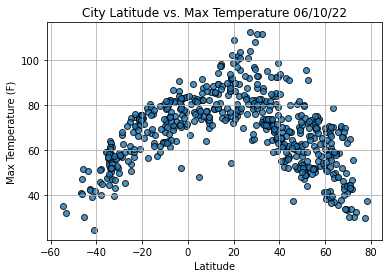

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

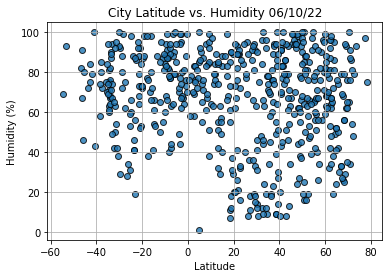

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

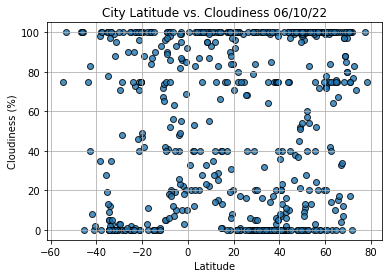

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

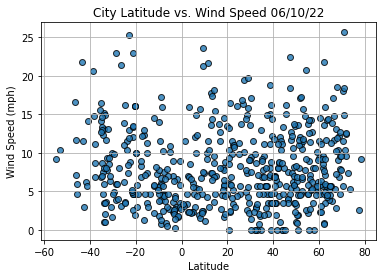

In [21]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                     Thompson
Country                        CA
Date          2022-06-10 07:16:02
Lat                       55.7435
Lng                      -97.8558
Max Temp                    50.16
Humidity                       66
Cloudiness                     75
Wind Speed                    0.0
Name: 13, dtype: object

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

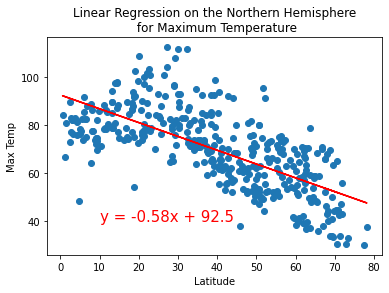

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

In [26]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.5764675638810087, intercept=92.49699159088685, rvalue=-0.689465007943834, pvalue=5.02987462672644e-56, stderr=0.030824700600905888, intercept_stderr=1.363608014620427)

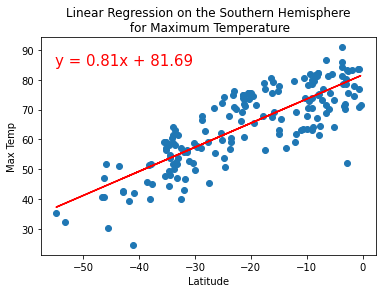

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-55,85))

In [28]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.8113323523247741, intercept=81.68849697284537, rvalue=0.8147315227905937, pvalue=4.832773631319068e-43, stderr=0.04377403769220823, intercept_stderr=1.0794449924983502)

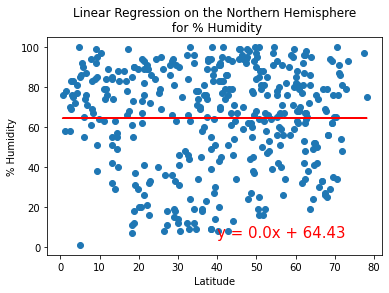

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,5))

In [30]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.0009971746569335217, intercept=64.4347786607917, rvalue=0.0007699056930799476, pvalue=0.987939272889995, stderr=0.06592344892863151, intercept_stderr=2.916289260174047)

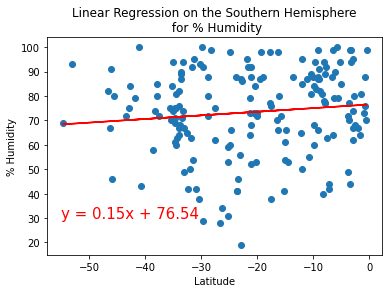

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-55,30))

In [32]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.1483172396834451, intercept=76.53869179806192, rvalue=0.11024043781736016, pvalue=0.1452470936883371, stderr=0.10137268124970483, intercept_stderr=2.4997975722628647)

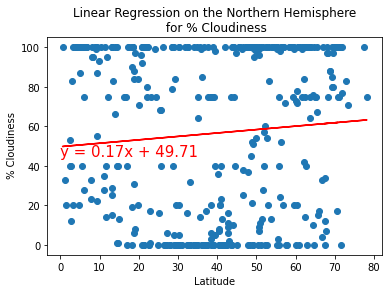

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness', ' % Cloudiness',(0,45))

In [34]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.17285924188252524, intercept=49.70809506840721, rvalue=0.08193951971926253, pvalue=0.10706540832256677, stderr=0.10701451219155153, intercept_stderr=4.7340556002288166)

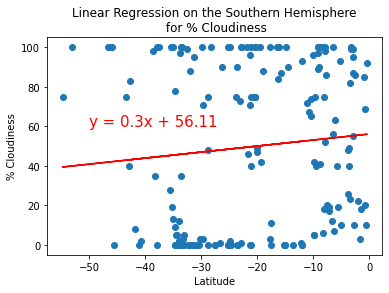

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

In [36]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.30455139046874613, intercept=56.10625279026545, rvalue=0.09714397870799443, pvalue=0.19962765097107116, stderr=0.23654356457009285, intercept_stderr=5.833041221334412)

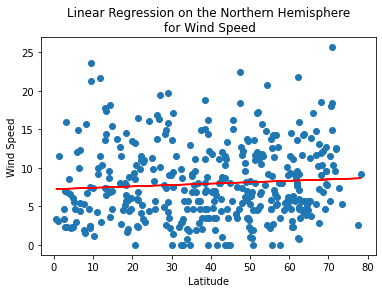

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(45,32))

In [38]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.018112225880535415, intercept=7.236059227566965, rvalue=0.07272391101995046, pvalue=0.15278395432339906, stderr=0.012642980197555094, intercept_stderr=0.5592939684730245)

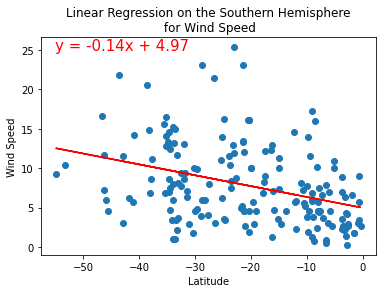

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-55,25))

In [40]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.13778999049916302, intercept=4.966021061887334, rvalue=-0.35798779814205167, pvalue=1.071407934028152e-06, stderr=0.02724547581652011, intercept_stderr=0.6718592569680293)